# Продвинутый Python, семинар 4

**Лектор:** Петров Тимур

**Семинаристы:** Петров Тимур, Коган Александра, Романченко Полина

**Spoiler Alert:** в рамках курса нельзя изучить ни одну из тем от и до досконально (к сожалению, на это требуется больше времени, чем даже 3 часа в неделю). Но мы попробуем рассказать столько, сколько возможно :)

## Что сегодня?

Ура мы заканчиваем исследование наших данных по TFT, сделаем определенные выводы и попробуем обучить целую модель, с помощью которой будем предсказывать место игрока!

Но вначале надо доисследовать данные, разобраться с Plotly и показать всю его мощь

Поехали!

![](https://pbs.twimg.com/media/D6MBvrkUIAEQlIi.jpg)

## Plotly

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
!wget https://github.com/Palladain/Deep_Python/raw/main/Seminars/Seminar_2/archive.zip

--2022-09-28 19:38:48--  https://github.com/Palladain/Deep_Python/raw/main/Seminars/Seminar_2/archive.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Palladain/Deep_Python/main/Seminars/Seminar_2/archive.zip [following]
--2022-09-28 19:38:48--  https://raw.githubusercontent.com/Palladain/Deep_Python/main/Seminars/Seminar_2/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694969 (679K) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>] 678.68K  --.-KB/s    in 0.1s    

2022-09-28 19:38:50 (6.45 MB/s) - ‘archive.zip’ saved [694969/694969]



In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: items.json              
  inflating: tft_3.5_last_500_gm_match_info.csv  
  inflating: tft_3.5_last_500_gm_unit_info.csv  
  inflating: traits.json             


In [ ]:
heroes = pd.read_csv('tft_3.5_last_500_gm_unit_info.csv')

matches = pd.read_csv("tft_3.5_last_500_gm_match_info.csv")
matches["winner"] = (matches.placement <= 4).astype("int")
matches.game_datetime = matches.game_datetime.apply(lambda x: parse(x))
matches['hour'] = matches.game_datetime.apply(lambda x: x.hour)
matches['day'] = matches.game_datetime.apply(lambda x: x.day)
matches['galaxy_numb'] = pd.factorize(matches.galaxy)[0]

Итак, с чего начнем?

Вспоминаем, как рисовали 24 графика по поводу каждой особенности. Выглядит классно и интересно, но смотреть столько графиков одновременно - немного жутко.

Вот хочется как на дашборде: берешь такой, протыкиваешь фильтры и пожалуйста, одна картинка

Но теперь мы знаем Plotly и с его помощью это и сделаем и покажем его интерактивность

### Задание 1

Сделайте график, который показывает распределение мест в зависимости от

Первое, что нам нужно сделать - нарисовать для каждой колонки свой собственный график, чтобы в зависимости от фильтра показывать нужное

In [ ]:
matches.columns

Index(['match_id', 'puuid', 'challenger', 'galaxy', 'placement',
       'game_datetime', 'Astro', 'Chrono', 'DarkStar', 'Set3_Celestial',
       'Set3_Mystic', 'Sniper', 'Vanguard', 'Cybernetic', 'Infiltrator',
       'ManaReaver', 'Battlecast', 'Blaster', 'Set3_Brawler', 'Rebel',
       'Starship', 'Demolitionist', 'Mercenary', 'Set3_Blademaster', 'Paragon',
       'Protector', 'Set3_Sorcerer', 'StarGuardian', 'MechPilot',
       'SpacePirate', 'winner', 'hour', 'day'],
      dtype='object')

Как это можно сделать?

*Ответы могут разными, но в общем и целом, ответ следующий: ну, давайте нарисуем все графики друг на друга, а потом просто возьмем и будем скрывать то, что нам банально не нужно*

*показать, как делать кнопки и как они работают с visible, можно изначально поиграться с opacity*

In [ ]:
cols = ['Astro', 'Chrono', 'DarkStar', 'Set3_Celestial',
       'Set3_Mystic', 'Sniper', 'Vanguard', 'Cybernetic', 'Infiltrator',
       'ManaReaver', 'Battlecast', 'Blaster', 'Set3_Brawler', 'Rebel',
       'Starship', 'Demolitionist', 'Mercenary', 'Set3_Blademaster', 'Paragon',
       'Protector', 'Set3_Sorcerer', 'StarGuardian', 'MechPilot',
       'SpacePirate']

fig = go.Figure()

#нарисуем все распределения
for col in cols:
    fig.add_trace(go.Box(x=matches[col], y=matches["placement"], visible=True, opacity=0.6))
    
# Наше меню для отображения
updatemenu= [dict()]

# Кнопки, на которые можно нажимать
buttons=[]

for i, col in enumerate(cols):
    visibles = [False] * len(cols)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))
    
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True

fig.update_layout(showlegend=False, updatemenus = updatemenu)
go.layout.Updatemenu(x=0, y=1)
fig.update_layout(
    title = {
        "text": "Placement distribution",
        "x": 0.5
    })

fig.show()

Ух ты, у нас это получилось! Попробуйте самостоятельно сделать следующее:

### Задание 2 (1 доп балл к первому дз)

Сделайте такое же распределение по чемпионам и их местам с разбивкой по признаку challenger

Отлично, с помощью подобных селекторов можно смотреть достаточно много вещей. причем селекторы бывают разные и довольно интересные, например, связанные со временем

### Задание 3


Сделайте график со слайдером c началом игры и их числу

In [ ]:
fig = go.Figure()

days = matches.groupby("game_datetime").agg({"match_id": "nunique"}).reset_index()

fig.add_trace(go.Scatter(x=days.game_datetime, y=days.match_id))

fig.update_layout(
    title = {
        "text": "Number of matches",
        "x": 0.5
    }
)

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

Что-то не очень хорошо получилось, правда? (Потому что каждая игра начиналась в уникальное время)

Давайте сделаем также, но только оставив дату и час

### Задание 4

Сделайте график со слайдером c началом игры (в виде дата + час) и их числу

In [ ]:
def strip_date(x):
    x = x.replace(minute=0)
    x = x.replace(second=0)
    return x

matches["gametime"] = matches.game_datetime.apply(lambda x: strip_date(x))

fig = go.Figure()

days = matches.groupby("gametime").agg({"match_id": "nunique"}).reset_index()

fig.add_trace(go.Scatter(x=days.gametime, y=days.match_id))

fig.update_layout(
    title = {
        "text": "Number of matches",
        "x": 0.5
    }
)

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

Что еще можем посмотреть интересного? Можем посмотреть, например, на использование чемпионов во времени!

### Задание 5

Отобразите динамику использования чемпионов и их винрейта во времени

In [ ]:
res = pd.merge(matches[['match_id', 'puuid', 'gametime', "winner"]], heroes[["match_id", "puuid", "champion", "traits_1"]], on=['match_id', 'puuid'], how='inner')
res = res.groupby(["champion", "gametime", "traits_1"]).agg({"puuid": "nunique", "winner": "sum"}).reset_index()
res["gametime"] = res.gametime.apply(lambda x: str(x))
res["perc"] = res.winner / res.puuid

In [ ]:
px.scatter(res, x="puuid", y="perc", animation_frame="gametime", animation_group="champion",
           size="winner", color="traits_1", hover_name="champion", range_x=[-1,50], range_y=[-1,2])

К сожалению в нашем датасете нет никаких координат, поэтому для карт давайте вернемся к нашим картам из лекции

In [ ]:
cities = pd.read_csv('https://raw.githubusercontent.com/hflabs/city/master/city.csv')
cities.head()

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730


In [ ]:
fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], lon=cities['geo_lon'], text=cities['city']))
capital = cities[cities['region']=='Москва']
map_center = go.layout.mapbox.Center(lat=capital['geo_lat'].values[0], lon=capital['geo_lon'].values[0])
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=5))
fig.show()

Пока что выглядит скудно. Давайте немного добавим ей информативности!

### Задание 6

Посмотрите на данные по году основания города и населению. Нанесите на карту с помощью цвета информацию о годе основания и с помощью размера население

In [ ]:
cities.foundation_year.unique()

In [ ]:
cities.population.unique()

array([ 12689, 144055,  62861, ...,  41001,  34505, 591486])

In [ ]:
def to_int_size(value):
    try:
        return np.log10(int(value))
    except:
        return np.log10(int(value.split('[')[0]))

def to_int_year(value):
    try:
        return int(value)
    except:
        return None

cities['foundation_year'] = cities['foundation_year'].map(to_int_year)

fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], 
                                 lon=cities['geo_lon'], 
                                 text=cities['city'],
                                 marker=dict(colorbar=dict(title="Год основания"),
                                             color=cities['foundation_year'],
                                             size=cities['population'].map(to_int_size))))
capital = cities[cities['region']=='Москва']
map_center = go.layout.mapbox.Center(lat=capital['geo_lat'].values[0], lon=capital['geo_lon'].values[0])
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=2))
fig.show()


Красота! Города есть, остались дороги!

### Задание 7

Используя данные по путешествию на поезде Москва-Владивосток, изобразите жд линию на карте с учетом числа дней поездки

In [ ]:
train_russia = pd.read_csv('https://gist.githubusercontent.com/lexnekr/2da07b5fc12b5be24068e4d68ed47ca5/raw/d6256765a3223282fbfec7e0b040cbfb21593fff/train_russia.scv')
train_russia.head(5)

,day number,city,geo_lat,geo_lon
0,1,г Москва,55.754047,37.620405
1,1,Владимир,56.128080,40.408438
2,1,Нижний Новгород,56.324063,44.005391
3,1,Семенов,56.788979,44.490288
4,1,Киров,58.603526,49.667930


In [ ]:
data = [go.Scattermapbox(legendgroup="group",
                         name='Города России',
                         lat=cities['geo_lat'], 
                         lon=cities['geo_lon'],
                         text=cities['city'],
                         marker=dict(colorbar=dict(title="Год основания"),
                                     color=cities['foundation_year'].map(to_int_year),
                                     size=cities['population'].map(to_int_size)))]
for df_for_today in train_russia.groupby(['day number']):
    data.append(go.Scattermapbox(visible=False,
                                 name='День {}'.format(df_for_today[0]),
                                 mode = "lines",
                                 hoverinfo='skip',
                                 lat=df_for_today[1]['geo_lat'],
                                 lon=df_for_today[1]['geo_lon']))    



fig = go.Figure(data)

frames=[]
for i in range(len(data)+1):
    temp_frame = go.Frame(name=str(i), data=data)

    for j in range(1, i):
        temp_frame['data'][j]['visible']=True
    
    
    frames.append(temp_frame)

steps = []
for i in range(len(data)):
    step = dict(
        label = str(i),
        method = "animate",
        args = [[str(i+1)]]
    )
    steps.append(step)

sliders = [dict(
    currentvalue = {"prefix": "День №", "font": {"size": 20}},
    len = 0.9,
    x = 0.1,
    pad = {"b": 10, "t": 50},
    steps = steps,
)]

map_center = go.layout.mapbox.Center(lat=(cities['geo_lat'].max()+cities['geo_lat'].min())/2, 
                                     lon=(cities['geo_lon'].max()+cities['geo_lon'].min())/2)
fig.update_layout(
                  legend_orientation="h",
                  mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=2),
                  updatemenus=[dict(direction="left",
                                    pad = {"r": 10, "t": 80},
                                    x = 0.1,
                                    xanchor = "right",
                                    y = 0,
                                    yanchor = "top",
                                    showactive=False,
                                    type="buttons", 
                                    buttons=[dict(label="►", method="animate", args=[None, {"fromcurrent": True}]),
                                             dict(label="❚❚", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False},
                                                                                               "mode": "immediate",
                                                                                               "transition": {"duration": 0}}])])],
                  )


fig.layout.sliders = sliders
fig.frames = frames  

fig.show()

## Jax

И мы подошли к концу изучения данных, давайте попробуем обучить какую-нибудь модель!

Когда вы слышите про обучение модели, то вы, наверное, сразу же думаете про tensorflow, pytorch etc. Однако есть библиотека, которая появилась в 2020 году и называется [JAX](https://jax.readthedocs.io/en/latest/index.html)

Но зачем?..

1. Он сильно проще, даже чем pytorch. По своему коду он максимально напоминает Numpy (то есть более низкий порог входа)

2. Он достаточно быстрый за счет объединения

* [XLA](https://www.tensorflow.org/xla) - оптимизация вычислений для линейной алгебры (за счет оптимизации использования ядер)

* [Autograd](https://github.com/hips/autograd) - возможность неявного построения графа вычислений за счет трассировки (отслеживания выполнени] операций внутри кода). Тот же TensorFlow строит это все добро явно, что замедляет процесс



Попробуем что-нибудь обучить с помощью JAX

In [ ]:
!pip install jax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


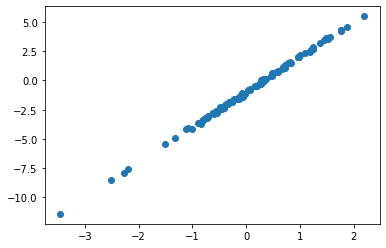

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys);

In [ ]:
def model(theta, x): # посчитать значения на шаге
  """Computes wx + b on a batch of input x."""
  w, b = theta
  return w * x + b

def loss_fn(theta, x, y): # считаем функцию потерь (как близко мы к ответу)
  prediction = model(theta, x)
  return jnp.mean((prediction-y)**2)

def update(theta, x, y, lr=0.1): # делаем обучение через градиентный спуск
  return theta - lr * jax.grad(loss_fn)(theta, x, y)

w: 3.00, b: -0.99


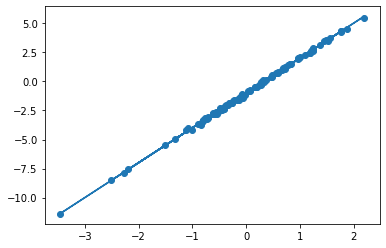

In [ ]:
theta = jnp.array([1., 1.])

for _ in range(1000):
  theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")

Ух ты, все получилось! Причем если мы посмотрим на код, то в нем непонятное только jax.grad (подсчет градиента, он автоматический)

В этом и вся прелесть: знаем Numpy, то почти можем применять Jax

А теперь давайте забабахаем нейронную сеть, которая будет обучаться на наших данных и предсказывать места

In [ ]:
from jax import grad, jit, vmap
from jax import random
from jax.scipy.special import logsumexp

In [ ]:
def random_layer_params(m, n, key, scale=1e-2):
  w_key, b_key = random.split(key) # генерация рандома
  return scale * random.normal(w_key, (n, m)), scale * random.normal(b_key, (n,)) # и нормальные распределения

def init_network_params(sizes, key):
  keys = random.split(key, len(sizes))
  return [random_layer_params(m, n, k) for m, n, k in zip(sizes[:-1], sizes[1:], keys)]

layer_sizes = [26, 128, 256, 8] # размеры наших сетей
step_size = 0.05 # шаг
num_epochs = 15 # сколько раз будем учить
batch_size = 16 # сколько за раз данных будем загонять
n_targets = 8 # сколько классов
params = init_network_params(layer_sizes, random.PRNGKey(0)) 

In [ ]:
def relu(x):
  return jnp.maximum(0, x)

def predict(params, data):
    activations = data
    for w, b in params[:-1]:
        outputs = jnp.dot(w, activations) + b
        activations = relu(outputs)
    final_w, final_b = params[-1]
    logits = jnp.dot(final_w, activations) + final_b
    return logits - logsumexp(logits)

batched_predict = vmap(predict, in_axes=(None, 0))

In [ ]:
def one_hot(x, k, dtype=jnp.float32):
    return jnp.array(x[:, None] == jnp.arange(k), dtype)
  
def accuracy(params, data, targets):
    target_class = jnp.argmax(targets, axis=1)
    predicted_class = jnp.argmax(batched_predict(params, data), axis=1)
    return jnp.mean(predicted_class == target_class)

def loss(params, data, targets):
    preds = batched_predict(params, data)
    return -jnp.mean(preds * targets)

def update(params, x, y):
    grads = grad(loss)(params, x, y)
    return [(w - step_size * dw, b - step_size * db)
            for (w, b), (dw, db) in zip(params, grads)]

Теперь подготовим данные (возьмем только то, что у нас есть в matches и при этом числа без часов и дней):

In [ ]:
matches.head()

,match_id,puuid,challenger,galaxy,placement,game_datetime,Astro,Chrono,DarkStar,Set3_Celestial,...,Paragon,Protector,Set3_Sorcerer,StarGuardian,MechPilot,SpacePirate,winner,hour,day,galaxy_numb
0,NA1_3569517250,7AKHCtexkJJo8p04lg4shtx7n7R-uH6pQwPhBCEofkIJca...,0,Treasure Trove,1,2020-09-10 05:18:02,0,0,3,2,...,0,1,0,0,0,0,1,5,10,0
1,NA1_3569517250,0StQeXmDacsAikvEcY2ubarDZqzlEsaYsZHO6UT-UgBFY7...,0,Treasure Trove,2,2020-09-10 05:18:02,0,0,0,0,...,1,1,2,2,0,0,1,5,10,0
2,NA1_3569517250,Y0emdKI096n9-Rb0L4_I4pP_tmn_kwCtKiEjIsBRrxRqX_...,1,Treasure Trove,3,2020-09-10 05:18:02,0,1,0,0,...,0,0,0,0,0,0,1,5,10,0
3,NA1_3569517250,1vCCOdxLrdYa6NQRhywKKdZ0UNdX0nsa15Zpqo03k6QFs6...,1,Treasure Trove,4,2020-09-10 05:18:02,0,0,1,0,...,1,1,2,1,0,0,1,5,10,0
4,NA1_3569517250,mC0hMfKYhejc1U1aJE7iTOTn6TUDkY4apfQhdw2Pvp_jV3...,0,Treasure Trove,5,2020-09-10 05:18:02,0,0,0,1,...,1,1,0,0,0,0,0,5,10,0


In [ ]:
matches = matches.select_dtypes(include=['int64'])
matches = matches.drop(columns=["hour", "day", "placement"])
matches.head()

,challenger,Astro,Chrono,DarkStar,Set3_Celestial,Set3_Mystic,Sniper,Vanguard,Cybernetic,Infiltrator,...,Mercenary,Set3_Blademaster,Paragon,Protector,Set3_Sorcerer,StarGuardian,MechPilot,SpacePirate,winner,galaxy_numb
0,0,0,0,3,2,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,2,2,0,0,1,0
2,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,1,0,1,0,0,0,0,...,0,0,1,1,2,1,0,0,1,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


Разделим на train-test, выделим placement как наш таргет и загоним в нашу модель

In [ ]:
from sklearn.model_selection import train_test_split

X, y = np.array(matches.drop(columns=["winner"])), np.array(matches.winner)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
def group_list(X, y, group_size):
    for i in range(0, len(X), group_size):
        yield X[i:i+group_size], y[i:i+group_size]

In [ ]:
import time

for epoch in range(num_epochs):
  start_time = time.time()
  for x, y in group_list(X_train, y_train, batch_size):
      y = one_hot(y, n_targets)
      params = update(params, x, y)
  epoch_time = time.time() - start_time

  train_acc = accuracy(params, X_train, one_hot(y_train, n_targets))
  test_acc = accuracy(params, X_test, one_hot(y_test, n_targets))
  print("Epoch {} in {:0.2f} sec".format(epoch, epoch_time))
  print("Training set accuracy {}".format(train_acc))
  print("Test set accuracy {}".format(test_acc))

Epoch 0 in 3.80 sec
Training set accuracy 0.5067164301872253
Test set accuracy 0.48636361956596375
Epoch 1 in 3.79 sec
Training set accuracy 0.5067164301872253
Test set accuracy 0.48636361956596375
Epoch 2 in 3.75 sec
Training set accuracy 0.5067164301872253
Test set accuracy 0.48636361956596375
Epoch 3 in 3.83 sec
Training set accuracy 0.5067164301872253
Test set accuracy 0.48636361956596375
Epoch 4 in 3.82 sec
Training set accuracy 0.49514925479888916
Test set accuracy 0.5272727012634277
Epoch 5 in 4.63 sec
Training set accuracy 0.49850746989250183
Test set accuracy 0.5196969509124756
Epoch 6 in 3.74 sec
Training set accuracy 0.4973880648612976
Test set accuracy 0.5287878513336182
Epoch 7 in 3.73 sec
Training set accuracy 0.4973880648612976
Test set accuracy 0.5219696760177612
Epoch 8 in 4.68 sec
Training set accuracy 0.516417920589447
Test set accuracy 0.5068181753158569
Epoch 9 in 3.73 sec
Training set accuracy 0.5067164301872253
Test set accuracy 0.48636361956596375
Epoch 10 in 3.

Как вы думаете, почему так плохо обучается?

*Ответ: игра очень сильно зависит от рандома, как-то так*

## Попугай дня

![](https://upload.wikimedia.org/wikipedia/commons/0/0b/Probosciger_aterrimus-20030511.jpg)

Некоторые виды попугаев очень сильно отличаются от нашего стандартного представления. Вот это - черный какаду, не похож на обычного, правда?

![](https://upload.wikimedia.org/wikipedia/commons/a/a8/Umbrella_Cockatoo_%28Cacatua_alba%29_-on_branch.jpg)

Но как и все какаду они очень шумные, веселые (а еще очень популярны из-за своего необычного вида)

Мораль: черные лебеди есть всегда и везде, не забывайте про них